HUMAN FACE COUNTER 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

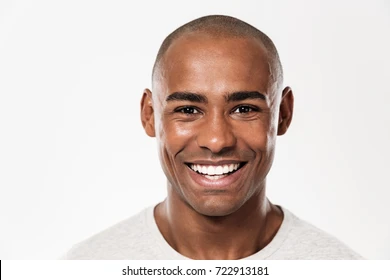

In [ ]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img=cv2.imread("/content/human pic.webp")
cv2_imshow(img)

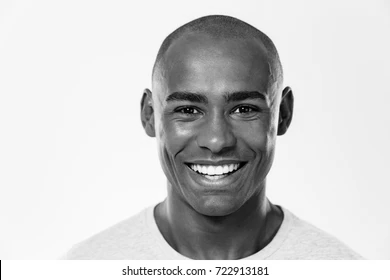

In [ ]:
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [ ]:
faces=face_cascade.detectMultiScale(gray)
print(faces)

[[149  53 139 139]]


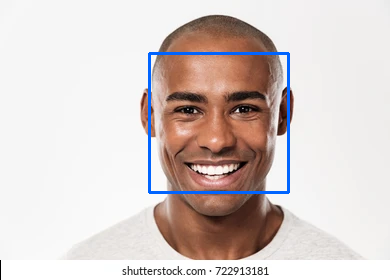

In [ ]:
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255,100,0), 2)
#Display the output
cv2_imshow(img)

To use the cam using the openCV, the code written in below cell is used. But however google colab being an online service has its own limitations and thus does not support the following code.

[[166  90  43  43]
 [220  93  37  37]]


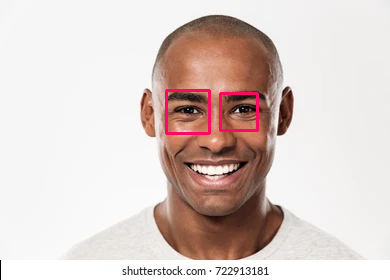

In [ ]:
eye_cascade=cv2.CascadeClassifier('/content/haarcascade_eye.xml')
img=cv2.imread("/content/human pic.webp")
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
eyes=eye_cascade.detectMultiScale(gray)
print(eyes)
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x, y), (x+w, y+h), (100, 10, 250), 2)
#Display the output
cv2_imshow(img)

Lets make a function and pass the image_path to the function as the parameter and let the function detect the human face in the image.

In [ ]:
import cv2
vid=cv2.VideoCapture(0)

while(True):

  #Capture the video frame
  ret, frame=vid.read()

  #Display the resulting frame
  cv2_imshow(frame)

  # the 'q' button is set as the 
  # quitting button may use any 
  # desired button of choice
  if cv2.waitKey(1) & 0xFF ==ord('q'):
    break


In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


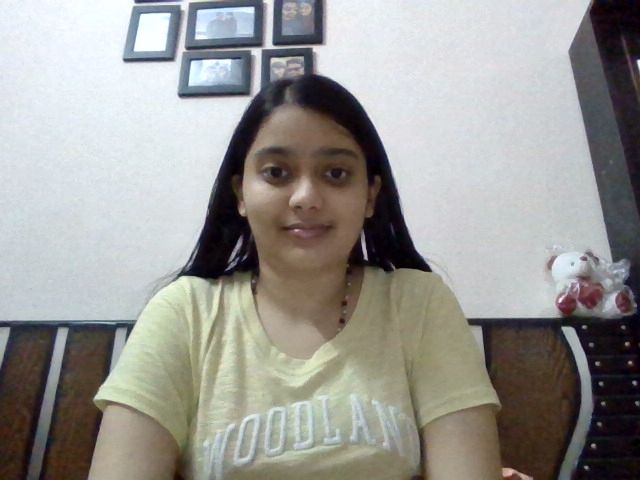

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

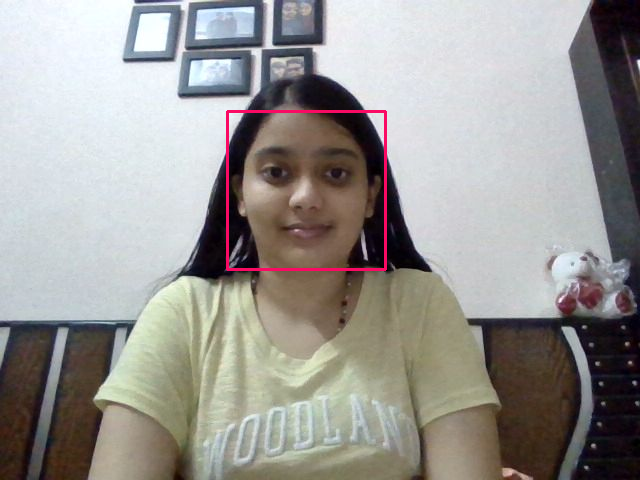

In [17]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img=cv2.imread("/content/photo.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces=face_cascade.detectMultiScale(gray)
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (100, 10, 250), 2)
#Display the output
cv2_imshow(img)

In [19]:
def fun_to_detect(img_path):
  face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  img=cv2.imread(img_path)
  gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces=face_cascade.detectMultiScale(gray)
  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (100, 10, 250), 2)
  #Display the output
  cv2_imshow(img)

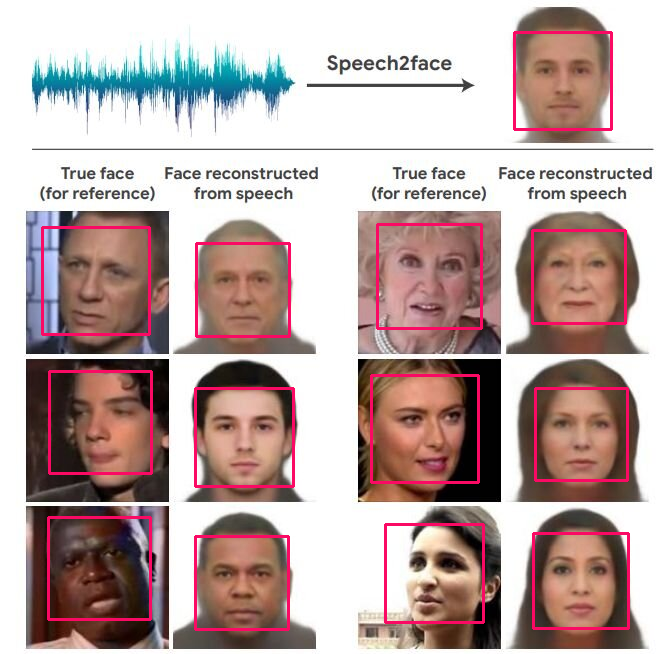

In [20]:
fun_to_detect("/content/5d020eb457ae2.jpg")

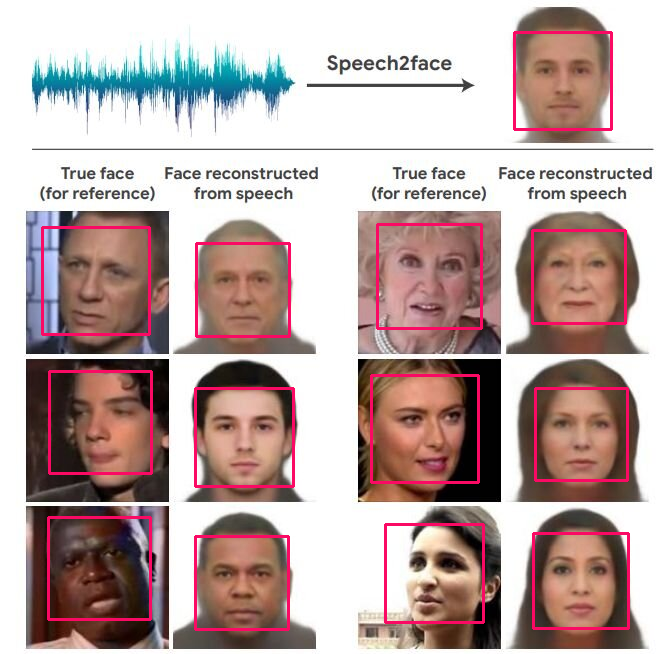

In [21]:
img_path="/content/5d020eb457ae2.jpg"

fun_to_detect(img_path)